# **Step 1: Import Libraries**

In [ ]:
import pandas as pd              # For handling data
import numpy as np               # For numerical operations
from sklearn.preprocessing import StandardScaler  # For scaling data
from sklearn.cluster import KMeans               # For clustering
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For visualizations

# **Step 2: Load the CSV File**

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/Superstore Marketing Data.csv')

# **Step 3: Explore and Describe the Dataset**

In [ ]:
# Display the first few rows to understand the structure of the dataset
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Display the shape of the dataset (number of rows and columns)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 2240
Number of Columns: 22


In [ ]:
# Check for missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


# **Step 4: Data Cleaning and Preprocessing**

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm that there are no missing values left
print("Missing Values after Dropping Rows:")
print(df.isnull().sum())

Missing Values after Dropping Rows:
Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


In [ ]:
# Identify categorical columns
categorical_cols = ['Education', 'Marital_Status']

# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,84835.0,0,0,6/16/2014,0,189,104,379,...,False,False,False,False,True,False,False,False,False,False
1,1,1961,57091.0,0,0,6/15/2014,0,464,5,64,...,False,False,False,False,False,False,True,False,False,False
2,10476,1958,67267.0,0,1,5/13/2014,0,134,11,59,...,False,False,False,False,False,True,False,False,False,False
3,1386,1967,32474.0,1,1,########,0,10,0,1,...,False,False,False,False,False,False,False,True,False,False
4,5371,1989,21474.0,1,0,########,0,6,16,24,...,False,False,False,False,False,False,True,False,False,False


# **Step 5: Clustering**

In [ ]:
# Drop the unnecessary columns: 'Id' and 'Dt_Customer'
df_clustering = df_encoded.drop(columns=['Id', 'Dt_Customer'])

# Display the first few rows to check the changes
df_clustering.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1970,84835.0,0,0,0,189,104,379,111,189,...,False,False,False,False,True,False,False,False,False,False
1,1961,57091.0,0,0,0,464,5,64,7,0,...,False,False,False,False,False,False,True,False,False,False
2,1958,67267.0,0,1,0,134,11,59,15,2,...,False,False,False,False,False,True,False,False,False,False
3,1967,32474.0,1,1,0,10,0,1,0,0,...,False,False,False,False,False,False,False,True,False,False
4,1989,21474.0,1,0,0,6,16,24,11,0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

# Display the first few rows of the scaled data
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.098441,1.294840,-0.823039,-0.928972,-1.693488,-0.344228,1.951592,0.945465,1.340203,3.944475,...,-0.444062,-0.52653,-0.030056,-0.036819,2.924333,-0.794110,-0.519533,-0.590553,-0.188452,-0.030056
1,-0.652633,0.192461,-0.823039,-0.928972,-1.693488,0.471186,-0.536787,-0.459326,-0.559697,-0.658233,...,-0.444062,-0.52653,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,-0.902990,0.596794,-0.823039,0.909066,-1.693488,-0.507311,-0.385976,-0.481624,-0.413550,-0.609527,...,-0.444062,-0.52653,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
3,-0.151917,-0.785669,1.039938,0.909066,-1.693488,-0.874989,-0.662463,-0.740284,-0.687574,-0.658233,...,-0.444062,-0.52653,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,1.684040,-1.222743,1.039938,-0.928972,-1.693488,-0.886850,-0.260301,-0.637712,-0.486623,-0.658233,...,-0.444062,-0.52653,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056


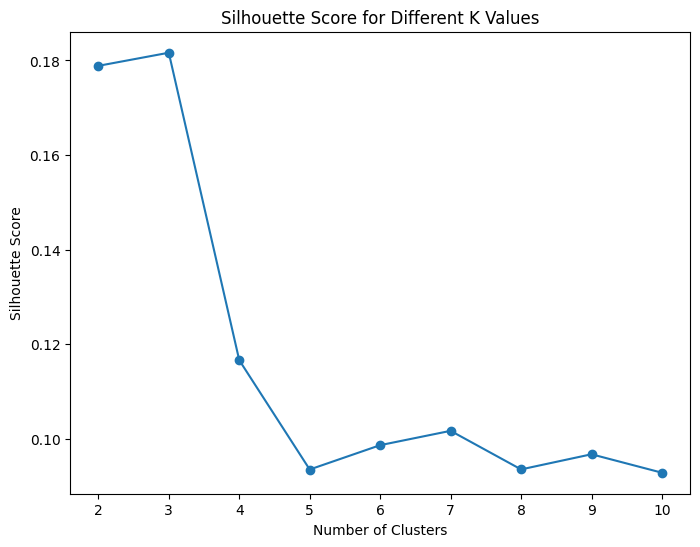

The best number of clusters based on silhouette score is: 3


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

# Try different numbers of clusters (e.g., from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Print the best score and number of clusters
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters based on silhouette score is: {best_k}")

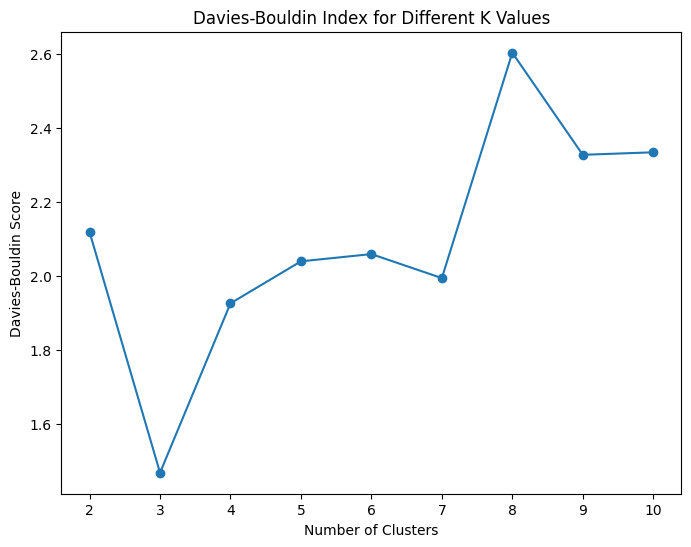

The best number of clusters based on Davies-Bouldin index is: 3


In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

db_scores = []

# Try different numbers of clusters (e.g., from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
    db_scores.append(db_score)

# Plot Davies-Bouldin scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different K Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Print the best score and number of clusters
best_k_db = range(2, 11)[db_scores.index(min(db_scores))]
print(f"The best number of clusters based on Davies-Bouldin index is: {best_k_db}")

### **Feature Selection for Clustering**

We selected the following features for clustering to analyze client behaviors effectively:

1. **Income**: Represents purchasing power, helping identify clients with similar spending capacities.
2. **Recency**: Measures engagement based on how recently a purchase was made.
3. **MntWines**, **MntFruits**, **MntMeatProducts**, **MntFishProducts**, **MntSweetProducts**: These spending features capture clients' purchasing habits across different product categories.
4. **Kidhome** and **Teenhome**: Household structure affects spending patterns and product preferences.

These features allow us to cluster clients based on their purchasing behavior, engagement, and household context, which are crucial for understanding and segmenting the customer base.

In [ ]:
# Step 1: Create a subset of the dataset with selected features
selected_features = ['Income', 'Recency', 'MntWines', 'MntFruits',
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                     'Kidhome', 'Teenhome']

# Subset the DataFrame
df_selected = df_scaled[selected_features]

# Display the first few rows of the selected dataset
df_selected.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Kidhome,Teenhome
0,1.294840,-1.693488,-0.344228,1.951592,0.945465,1.340203,3.944475,-0.823039,-0.928972
1,0.192461,-1.693488,0.471186,-0.536787,-0.459326,-0.559697,-0.658233,-0.823039,-0.928972
2,0.596794,-1.693488,-0.507311,-0.385976,-0.481624,-0.413550,-0.609527,-0.823039,0.909066
3,-0.785669,-1.693488,-0.874989,-0.662463,-0.740284,-0.687574,-0.658233,1.039938,0.909066
4,-1.222743,-1.693488,-0.886850,-0.260301,-0.637712,-0.486623,-0.658233,1.039938,-0.928972


In [ ]:
# Step 2: Initialize the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the selected features
kmeans.fit(df_selected)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original scaled DataFrame
df_selected['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
df_selected.head()

<ipython-input-55-1049f327cb1e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Kidhome,Teenhome,Cluster
0,1.294840,-1.693488,-0.344228,1.951592,0.945465,1.340203,3.944475,-0.823039,-0.928972,0
1,0.192461,-1.693488,0.471186,-0.536787,-0.459326,-0.559697,-0.658233,-0.823039,-0.928972,2
2,0.596794,-1.693488,-0.507311,-0.385976,-0.481624,-0.413550,-0.609527,-0.823039,0.909066,2
3,-0.785669,-1.693488,-0.874989,-0.662463,-0.740284,-0.687574,-0.658233,1.039938,0.909066,1
4,-1.222743,-1.693488,-0.886850,-0.260301,-0.637712,-0.486623,-0.658233,1.039938,-0.928972,1


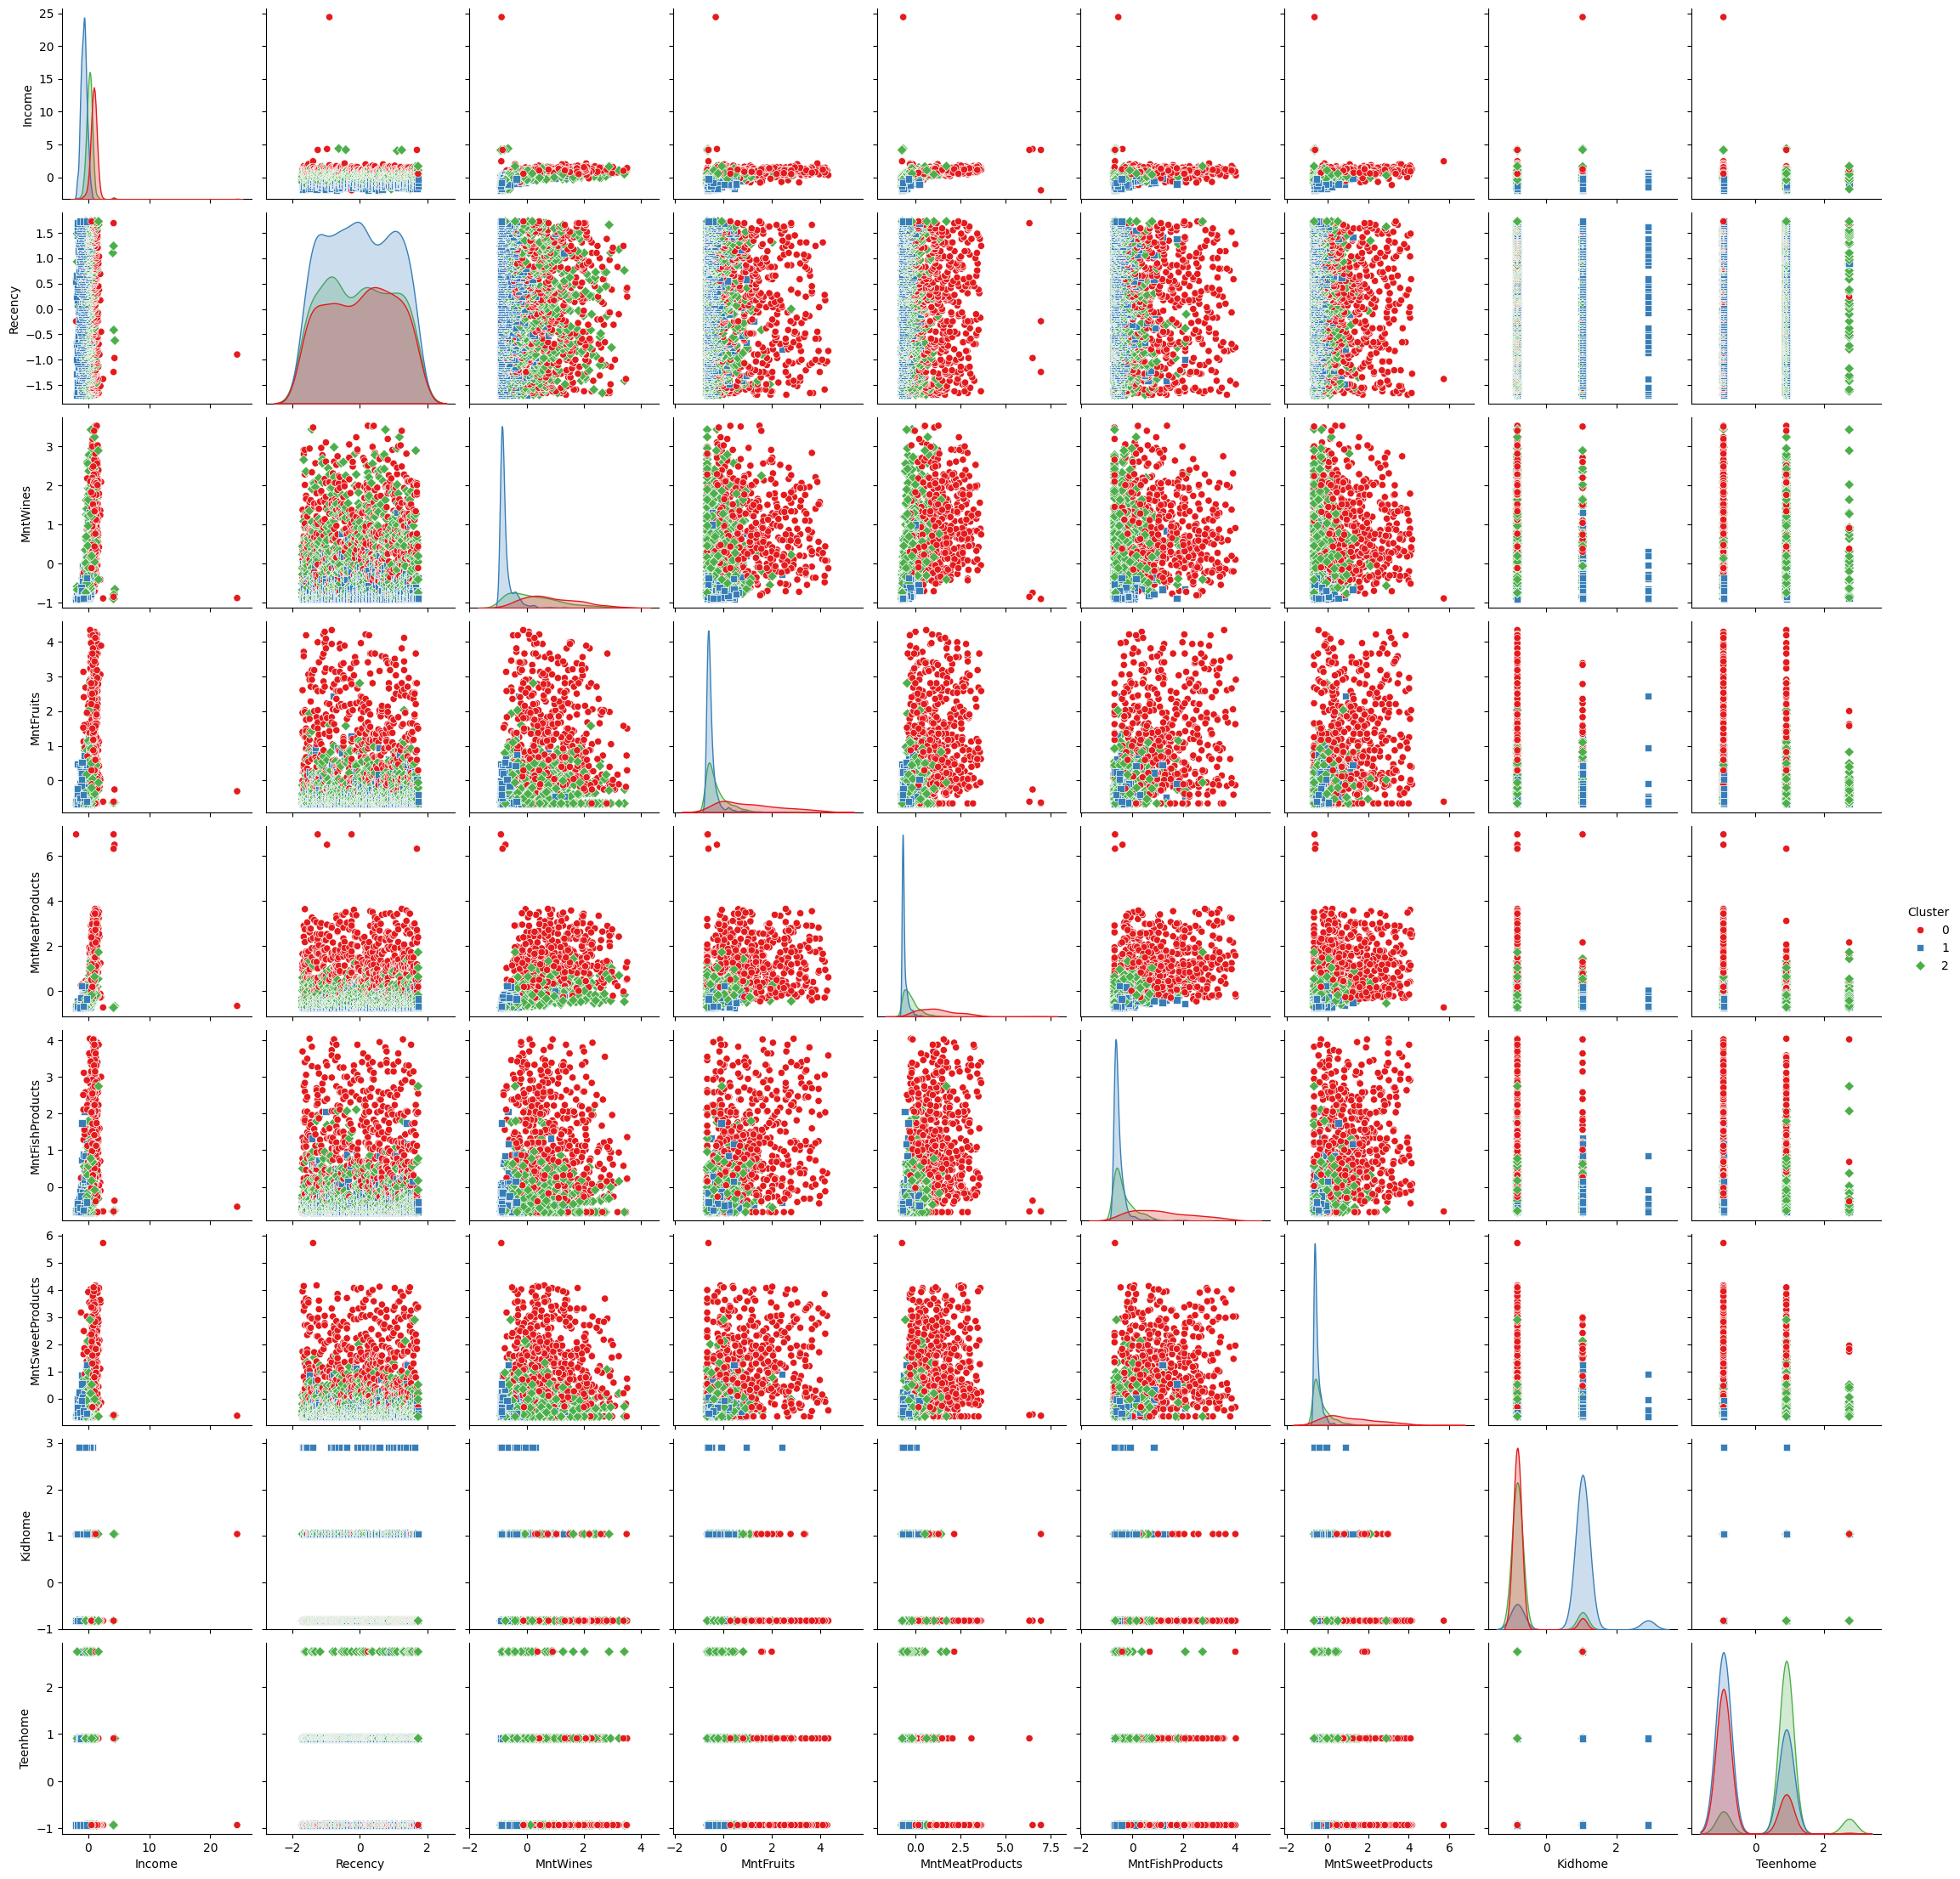

In [ ]:
# Create the pairplot with the selected features, colored by the cluster
sns.pairplot(df_selected, hue='Cluster', palette='Set1', diag_kind='kde', markers=["o", "s", "D"])

# Show the plot
plt.show()

In [ ]:
# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to display the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_selected.columns[:-1])  # Exclude the 'Cluster' column
cluster_centers_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Kidhome,Teenhome
0,0.944818,0.025377,0.879029,1.116570,1.256423,1.165788,1.140563,-0.714546,-0.519160
1,-0.728616,-0.002892,-0.745399,-0.511311,-0.612725,-0.527379,-0.517001,0.880310,-0.254833
2,0.196732,-0.018973,0.281232,-0.276192,-0.256432,-0.297777,-0.289830,-0.627681,0.844818


In [ ]:
# Add the cluster labels back to the original DataFrame
df_selected['Cluster'] = cluster_labels

# Group by 'Cluster' and calculate the mean for each feature
cluster_means = df_selected.groupby('Cluster').mean()

# Display the means for each cluster
cluster_means

<ipython-input-58-e86ee81c7e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Kidhome,Teenhome
Cluster,,,,,,,,,
0,0.944818,0.025377,0.879029,1.116570,1.256423,1.165788,1.140563,-0.714546,-0.519160
1,-0.728616,-0.002892,-0.745399,-0.511311,-0.612725,-0.527379,-0.517001,0.880310,-0.254833
2,0.196732,-0.018973,0.281232,-0.276192,-0.256432,-0.297777,-0.289830,-0.627681,0.844818


### Cluster Analysis Interpretation

Based on the cluster centers and means, we can interpret the characteristics of each cluster as follows:

---

#### **Cluster 0: High-Income, High Spending, and Low Family Involvement**
- **Income**: 0.944818 (relatively high) - These individuals tend to have a higher income compared to other clusters.
- **Recency**: 0.025377 (close to zero) - This suggests they are somewhat recent customers, but not the most frequent shoppers.
- **MntWines**: 0.879029 (high) - This cluster tends to spend a lot on wine.
- **MntFruits**: 1.116570 (high) - They also spend a lot on fruits.
- **MntMeatProducts**: 1.256423 (high) - High spending on meat products as well.
- **MntFishProducts**: 1.165788 (high) - High spending on fish products.
- **MntSweetProducts**: 1.140563 (high) - These individuals tend to spend significantly on sweet products.
- **Kidhome**: -0.714546 (low) - This cluster tends to have fewer children at home.
- **Teenhome**: -0.519160 (low) - This suggests they may have fewer teenagers in their households.

**Interpretation**: Cluster 0 consists of high-income individuals who spend heavily on various product categories (wine, fruits, meat, fish, and sweets). They are somewhat recent shoppers but don't appear to have many children or teens in their households. This group might be characterized as **affluent, high-spending adults with no children**.

---

#### **Cluster 1: Low-Income, Low Spending, and Families with Children**
- **Income**: -0.728616 (low) - These individuals have a relatively low income compared to other clusters.
- **Recency**: -0.002892 (near zero) - They are somewhat infrequent shoppers.
- **MntWines**: -0.745399 (low) - They spend relatively little on wine.
- **MntFruits**: -0.511311 (low) - They spend less on fruits as well.
- **MntMeatProducts**: -0.612725 (low) - Spending on meat products is relatively low.
- **MntFishProducts**: -0.527379 (low) - They spend less on fish products.
- **MntSweetProducts**: -0.517001 (low) - Their spending on sweets is also low.
- **Kidhome**: 0.880310 (high) - This group likely has children in the household.
- **Teenhome**: -0.254833 (moderate) - This suggests they may have fewer teenagers, but possibly children in general.

**Interpretation**: Cluster 1 is characterized by individuals with lower income and lower spending habits across various categories. They tend to have children in their households, which suggests they may prioritize family-oriented purchases. This cluster could be seen as **low-income families with young children**.

---

#### **Cluster 2: Moderate Income, Low Spending, and Mixed Family Composition**
- **Income**: 0.196732 (moderate) - These individuals have an income higher than Cluster 1 but lower than Cluster 0.
- **Recency**: -0.018973 (close to zero) - They are infrequent shoppers, similar to Cluster 1.
- **MntWines**: 0.281232 (moderate) - Moderate spending on wine.
- **MntFruits**: -0.276192 (low) - They spend less on fruits.
- **MntMeatProducts**: -0.256432 (low) - Spending on meat products is low.
- **MntFishProducts**: -0.297777 (low) - They also spend less on fish products.
- **MntSweetProducts**: -0.289830 (low) - Their spending on sweets is relatively low.
- **Kidhome**: -0.627681 (low) - They likely do not have children at home.
- **Teenhome**: 0.844818 (high) - This group likely has teenagers in their households.

**Interpretation**: Cluster 2 represents individuals with moderate income, who spend less overall on various products compared to the other clusters. They may not have children, but they likely have teenagers. This cluster could be described as **middle-income households with teenagers, but low spending**.

---

### **Summary of Cluster Characteristics**
- **Cluster 0**: High-income, high spending across various product categories, likely no children or teens at home.
- **Cluster 1**: Low-income, low spending, with a higher likelihood of having young children in the household.
- **Cluster 2**: Moderate income, low spending, with a higher likelihood of having teenagers in the household.

These characteristics provide valuable insights for targeting marketing efforts, creating tailored strategies for each segment, and understanding customer behavior.


In [ ]:
# Define a dictionary to map cluster numbers to custom labels
cluster_labels = {
    0: "Affluent Shoppers",
    1: "Low-Income Families",
    2: "Middle-Income Teen Households"
}

# Create a new column in df_selected to store the cluster labels
df_selected['Cluster_Label'] = df_selected['Cluster'].map(cluster_labels)

# Display the updated dataframe with the new labels
df_selected[['Cluster', 'Cluster_Label']].head()

<ipython-input-59-171debce3c35>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster_Label'] = df_selected['Cluster'].map(cluster_labels)


,Cluster,Cluster_Label
0,0,Affluent Shoppers
1,2,Middle-Income Teen Households
2,2,Middle-Income Teen Households
3,1,Low-Income Families
4,1,Low-Income Families


**Cluster 0: Affluent Shoppers**

High income and high spending, with fewer children or teens in the household.

---

**Cluster 1: Low-Income Families**

Low income and low spending, with a higher likelihood of having young children at home.

---

**Cluster 2: Middle-Income Teen Households**

Moderate income and low spending, with teenagers in the household but fewer or no children.


In [ ]:
!python --version

Python 3.10.12


We can add in CI/CD (when code changes, and automatically a new model is trained based on these changes), what is the response/complain % in each cluster; for exmaple, 56% of shoppers in cluster 1 responed to marketing campaigns (response = 1).